In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

%matplotlib inline

plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')


In [2]:
url_train_labels = 'https://raw.githubusercontent.com/Tyavicoli/pandas/main/train_labels.csv'
url_train_values ='https://raw.githubusercontent.com/Tyavicoli/pandas/main/train_values.csv'
df = pd.read_csv(url_train_labels,nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
edificios = pd.read_csv(url_train_values,dtype=datatypes)
daños = pd.read_csv(url_train_labels,dtype={'building_id':np.int32,'damage_grade':'category'})


<AxesSubplot:>

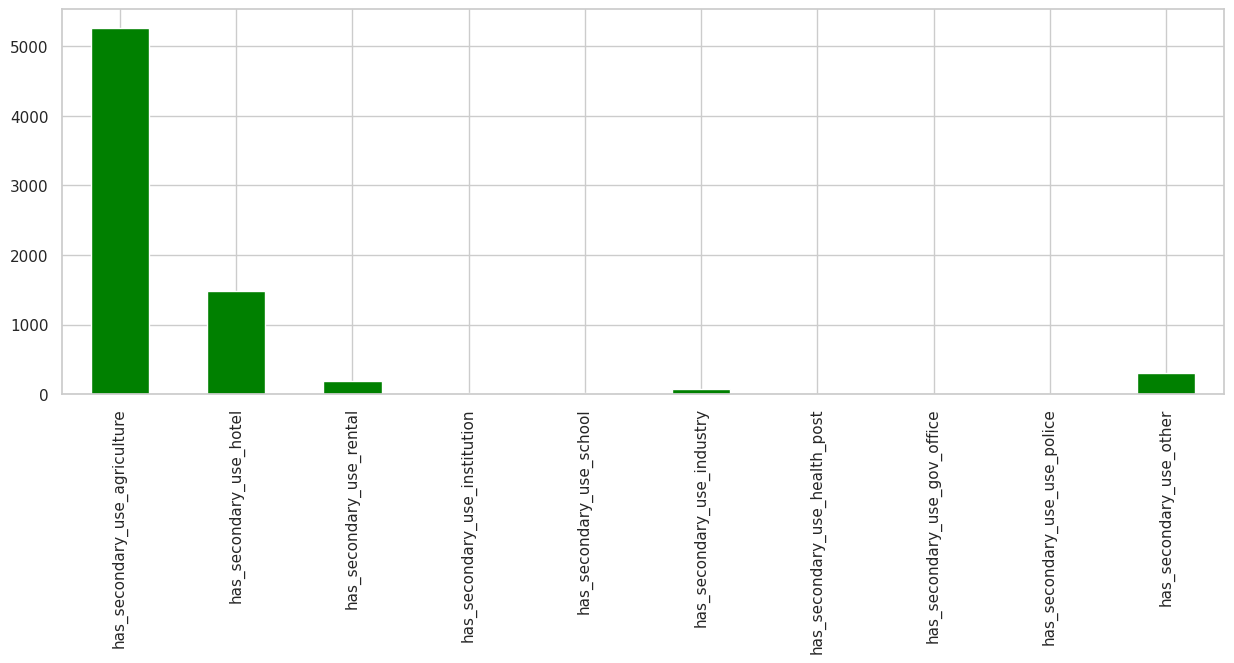

In [3]:
df_entero = edificios.merge(daños, left_on = 'building_id', right_on = 'building_id')
edificios_daño_3 = df_entero.loc[df_entero['damage_grade'] == '3', :]
edificios_daño_3_por_sector = edificios_daño_3.groupby('damage_grade').sum().reset_index()
edificios_daño_3_por_sector.iloc[2,22:].plot(kind='bar',color='green',figsize=(15,5))

<AxesSubplot:>

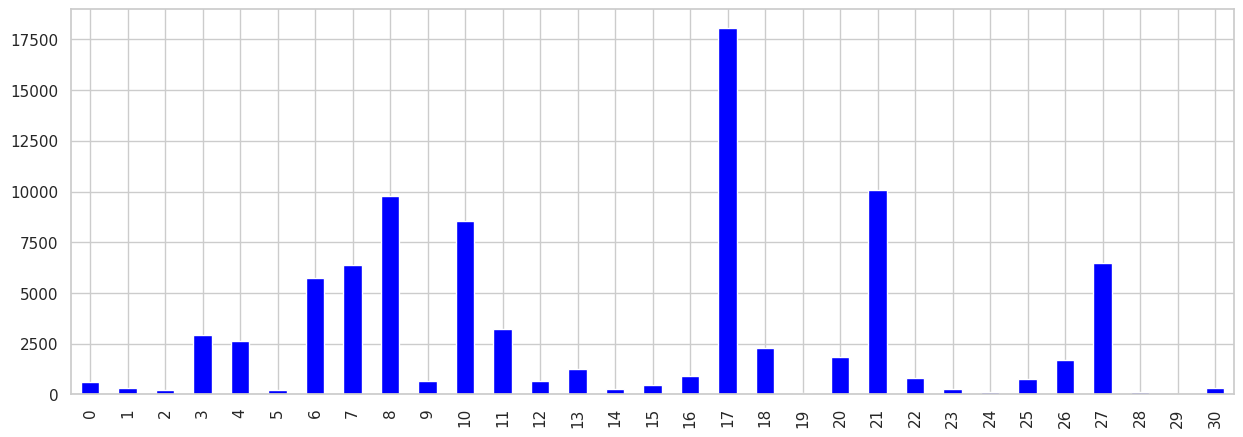

In [4]:
edificios_zona_geo_1 = edificios_daño_3.groupby('geo_level_1_id').sum().reset_index()
edificios_zona_geo_1['count_families'].plot(kind='bar',color='blue',figsize=(15,5))

In [21]:
edificios_por_daño_cimiento = df_entero.groupby(['foundation_type','damage_grade']).count().reset_index()
#edificios_por_daño_cimiento['building_id'].plot(kind='bar',color='blue',figsize=(15,5))
edificios_por_daño_cimiento = edificios_por_daño_cimiento.iloc[:,:3]
pivoted = pd.pivot(edificios_por_daño_cimiento,index='damage_grade',columns='foundation_type').rename(columns={'building_id':'cimiento'})
level_0 = pivoted.columns.get_level_values(0)
level_1 = pivoted.columns.get_level_values(1)
pivoted.columns = level_0 + '_' + level_1
pivoted = pivoted.reset_index().iloc[:,1:]
pivoted

,cimiento_h,cimiento_i,cimiento_r,cimiento_u,cimiento_w
0,358,6004,10720,3689,4353
1,579,4354,125515,8541,9270
2,511,221,82961,2030,1495


In [24]:
damage_cim_perc = pivoted.transpose()
damage_cim_perc = damage_cim_perc.div(damage_cim_perc.sum(axis=1), axis=0)
damage_cim_perc = damage_cim_perc.transpose()
damage_cim_perc

,cimiento_h,cimiento_i,cimiento_r,cimiento_u,cimiento_w
0,0.25,0.57,0.05,0.26,0.29
1,0.40,0.41,0.57,0.60,0.61
2,0.35,0.02,0.38,0.14,0.10


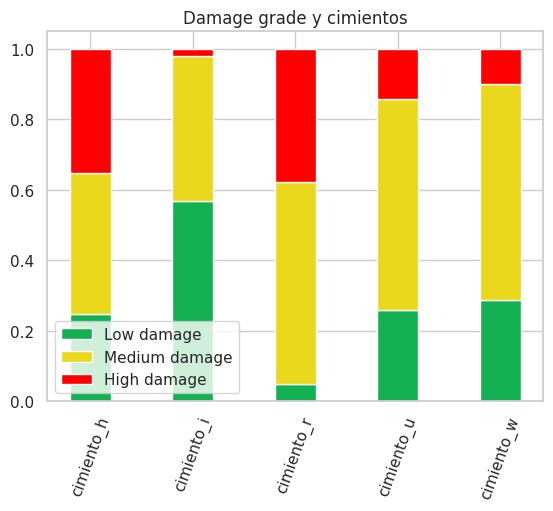

In [33]:
labels = damage_cim_perc.columns.to_list()

low_affected,medium_affected,high_affected = np.array(damage_cim_perc.values.tolist())

width = 0.4
fig, ax = plt.subplots()

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Damage grade y cimientos')
ax.legend()
plt.xticks(rotation=70)
plt.show()